In [130]:
"""
Výpočet osvětlení v předozadní ose svítidla
"""
from numpy import array, linspace, arctan, cos, sqrt, power, zeros, degrees, multiply, pi, radians

import matplotlib.pyplot as pl

In [125]:
HEIGHT = 5  # lamp at point X=0, Z=LAMP_HEIGHT
X_AXIS = linspace(-5, 10, 7)  # N=7
# ELEVATIONS_DEG = [0, 7, 14, 21] # light elevation
ELEVATIONS_DEG = [-20, 0, 20] # light elevation

In [126]:
def plot_curve(y_values, title="", ylabel=""):
    pl.plot(X_AXIS, y_values)
    pl.grid(True)
    pl.title(title)
    pl.xlabel("x[m]")
    pl.ylabel(ylabel)

In [127]:
# luminous intenzity I[cd] (cd = lm / sr)
def get_intenzity(angles: array) -> array:
    from light import Light
    from ldt_reader import LdtReader
    LDT_PATH = './ldt/portland/FLD153-D1.ldt'
    reader = LdtReader(LDT_PATH)
    light = Light(reader.azimuts, reader.elevations, reader.intenzities)
    intenzity = zeros(angles.shape)
    for i, angle in enumerate(angles):
        intenzity[i] = light.intenzity(0, degrees(angle))
    return intenzity

In [128]:
# vzdálenost k bodu
distances = sqrt(power(X_AXIS, 2) + HEIGHT**2)
#plot_curve(distances, ylabel="d[m]", title="Distance")
print(distances)

# úhel od kolmice k dopadu, 
angles = arctan(X_AXIS/HEIGHT)
#plot_curve(angles, ylabel="angle[rad]", title="Angles")
print(angles)
print(degrees(angles))

[ 7.07106781  5.59016994  5.          5.59016994  7.07106781  9.01387819
 11.18033989]
[-0.78539816 -0.46364761  0.          0.46364761  0.78539816  0.98279372
  1.10714872]
[-45.         -26.56505118   0.          26.56505118  45.
  56.30993247  63.43494882]


[ 4531.1439789   6582.35083291  9072.27395004 13891.55204211
  6051.51129744   749.65546135   100.11506823]
[ 2870.972769    4377.98380759  7322.22880998  9748.21737837
 13638.36890178 12588.46277755  7342.43274137]
[ 1161.37089751  2764.69836442  5055.4085715   8001.21643278
  9546.60858144 11708.31964946 13325.79712359]


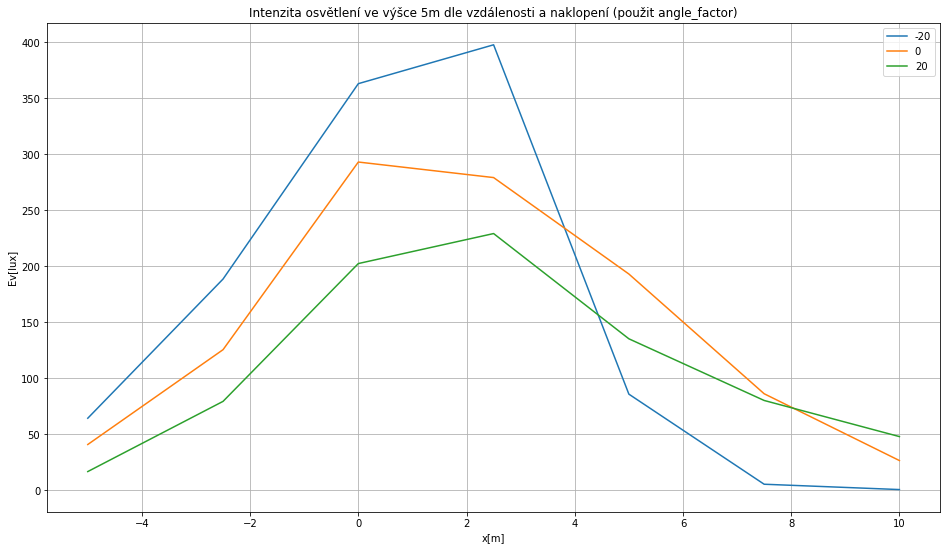

In [129]:
pl.figure(figsize=(16, 9))

for elev_deg in ELEVATIONS_DEG:
    # lumminous intenzity [cd]
    intenzity = get_intenzity(angles - radians(elev_deg))
    print(intenzity)
    # iluminance Ev[lux] = I * cos(b) / d^2
    angle_factor = cos(angles)
    distance_factor = 1/power(distances, 2)
    Ev = multiply(multiply(intenzity, angle_factor), distance_factor)
    #print(Ev)
    #Ev = multiply(intenzity, distance_factor)
    # plot_curve(intenzity, title="Intenzity", ylabel="I[cd]")
    # plot_curve(distance_factor)
    plot_curve(Ev, title=f"Intenzita osvětlení ve výšce {HEIGHT}m dle vzdálenosti a naklopení (použit angle_factor)", ylabel="Ev[lux]")
    pl.legend(ELEVATIONS_DEG)
